In [2]:
# الخلية 1: إعداد البيئة والمسارات
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# إضافة مسار المشروع إلى sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"تم إضافة المسار: {project_root} إلى sys.path")

# محاولة استيراد وحدات المشروع
try:
    from src.data_loading import load_iris_data, create_iris_dataframe, explore_dataset
    from src.model_training import train_models, get_best_model, prepare_data
    from src.model_evaluation import evaluate_model, plot_confusion_matrix, plot_feature_importance
    from src.utils import save_model, predict_new_sample
    print("✅ تم استيراد جميع وحدات المشروع بنجاح")
except ImportError as e:
    print(f"❌ خطأ في الاستيراد: {e}")
    print("سيتم استخدام وظائف بديلة داخل Notebook")

تم إضافة المسار: u:\iris-classification-project إلى sys.path
❌ خطأ في الاستيراد: cannot import name 'explore_dataset' from 'src.data_loading' (u:\iris-classification-project\src\data_loading.py)
سيتم استخدام وظائف بديلة داخل Notebook


In [3]:
# الخلية 2: تحميل واستكشاف البيانات
print("🔍 تحميل واستكشاف بيانات Iris")

try:
    # محاولة استخدام وظائف المشروع
    X, y, feature_names, target_names = load_iris_data('csv')
    df = create_iris_dataframe('csv')
    print("✅ تم تحميل البيانات باستخدام وظائف المشروع")
except:
    # إذا فشل الاستيراد، استخدام طريقة بديلة
    print("⚠️  استخدام طريقة بديلة لتحميل البيانات")
    
    # البحث عن ملف البيانات
    data_paths = [
        '../data/Iris.csv',
        './data/Iris.csv', 
        'Iris.csv'
    ]
    
    df = None
    for path in data_paths:
        if os.path.exists(path):
            df = pd.read_csv(path)
            print(f"✅ تم العثور على البيانات في: {path}")
            break
    
    if df is None:
        # إذا لم يتم العثور على ملف، استخدام بيانات scikit-learn
        print("⚠️  لم يتم العثور على ملف CSV، استخدام بيانات scikit-learn")
        iris = load_iris()
        df = pd.DataFrame(iris.data, columns=iris.feature_names)
        df['target'] = iris.target
        df['species'] = df['target'].apply(lambda x: iris.target_names[x])
        feature_names = iris.feature_names
        target_names = iris.target_names
    else:
        # معالجة ملف CSV
        if 'Id' in df.columns:
            df = df.drop('Id', axis=1)
        if 'id' in df.columns:
            df = df.drop('id', axis=1)
        
        # تحويل التصنيفات إلى أرقام
        species_mapping = {
            'Iris-setosa': 0,
            'Iris-versicolor': 1, 
            'Iris-virginica': 2
        }
        df['target'] = df['Species'].map(species_mapping)
        df['species'] = df['Species']
        
        feature_names = [col for col in df.columns if col not in ['Species', 'target', 'species']]
        target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    
    X = df[feature_names].values
    y = df['target'].values

# عرض معلومات عن البيانات
print(f"📊 شكل البيانات: {X.shape}")
print(f"🌸 عدد الأصناف: {len(np.unique(y))}")
print(f"🏷️  أسماء الأصناف: {target_names}")

print("\n📈 الإحصائيات الوصفية:")
print(df.describe())

print("\n📊 توزيع الأنواع:")
print(df['species'].value_counts())

print("\n👀 أول 5 صفوف من البيانات:")
display(df.head())

🔍 تحميل واستكشاف بيانات Iris
📁 تم العثور على البيانات في: u:\iris-classification-project\data\Iris.csv
📁 تم العثور على البيانات في: u:\iris-classification-project\data\Iris.csv
✅ تم تحميل البيانات باستخدام وظائف المشروع
📊 شكل البيانات: (150, 4)
🌸 عدد الأصناف: 3
🏷️  أسماء الأصناف: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

📈 الإحصائيات الوصفية:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.00

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa


📊 التحليل البصري للبيانات


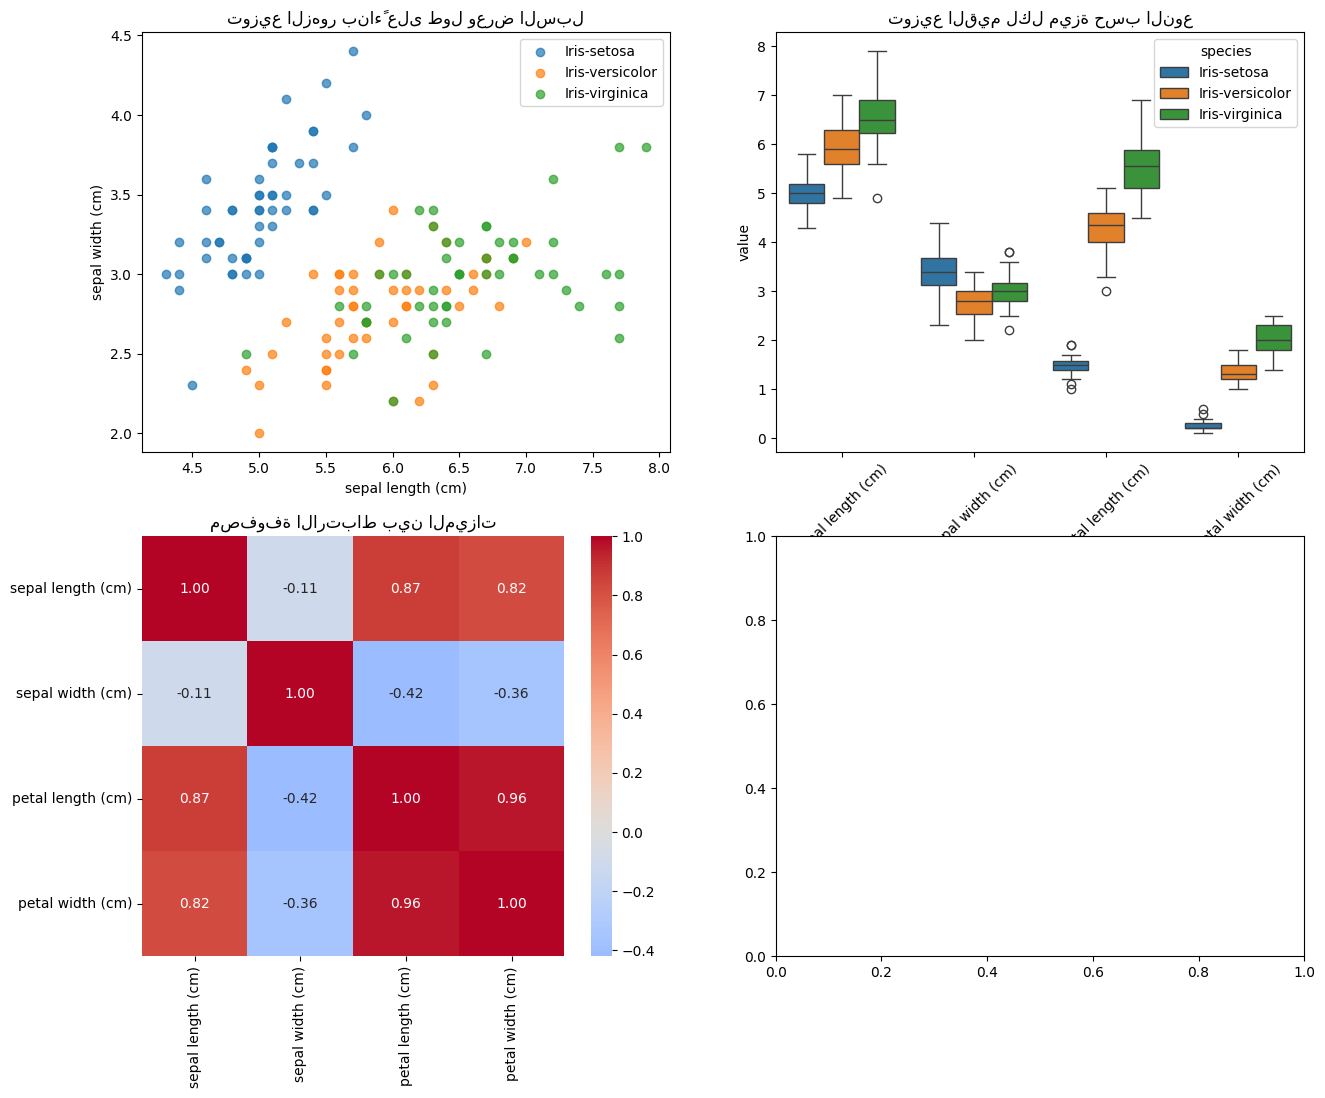

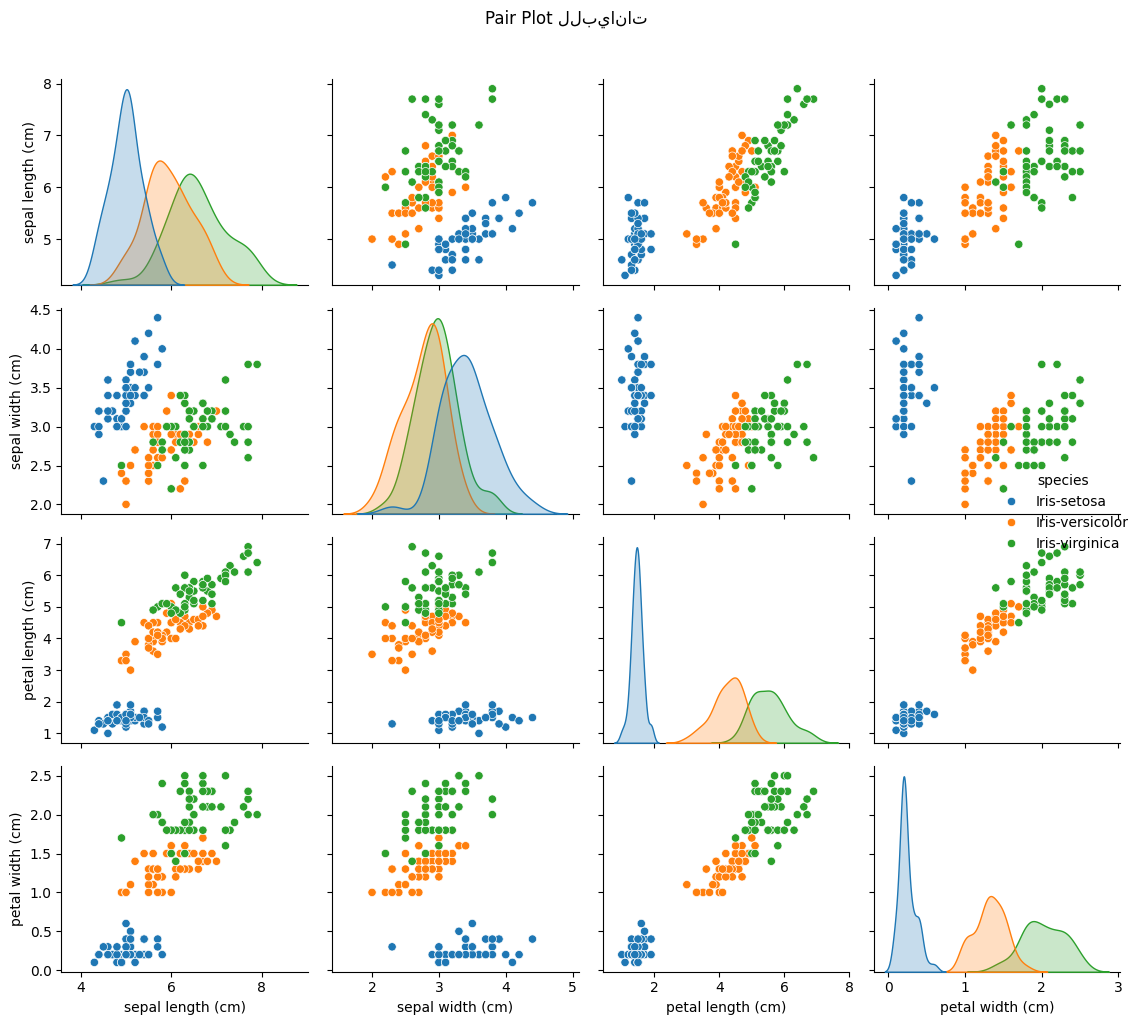

In [4]:
# الخلية 3: التحليل البصري للبيانات
print("📊 التحليل البصري للبيانات")

# إعداد الرسوم البيانية
plt.figure(figsize=(15, 12))

# 1. مخطط التشتت
plt.subplot(2, 2, 1)
for i, species in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=species, alpha=0.7)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.title('توزيع الزهور بناءً على طول وعرض السبل')

# 2. مخططات الصندوق
plt.subplot(2, 2, 2)
df_melted = df.melt(id_vars=['species'], value_vars=feature_names)
sns.boxplot(data=df_melted, x='variable', y='value', hue='species')
plt.xticks(rotation=45)
plt.title('توزيع القيم لكل ميزة حسب النوع')

# 3. مصفوفة الارتباط
plt.subplot(2, 2, 3)
correlation_matrix = df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('مصفوفة الارتباط بين الميزات')

# 4. مخطط الزوج
plt.subplot(2, 2, 4)
sns.pairplot(df, hue='species', vars=feature_names)
plt.suptitle('Pair Plot للبيانات', y=1.02)

plt.tight_layout()
plt.show()

In [5]:
# الخلية 4: تدريب وتقييم النماذج
print("🔬 تدريب وتقييم نماذج التصنيف")

try:
    # محاولة استخدام وظائف المشروع
    results = train_models(X, y)
    best_model, best_name, best_acc = get_best_model(results)
    print(f"✅ تم تدريب النماذج باستخدام وظائف المشروع")
except:
    # إذا فشل الاستيراد، استخدام طريقة بديلة
    print("⚠️  استخدام طريقة بديلة لتدريب النماذج")
    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    
    # تقسيم البيانات
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # تدريب نماذج مختلفة
    models = {
        'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
        'SVM': SVC(random_state=42, probability=True)
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {
            'model': model,
            'accuracy': accuracy
        }
        print(f"{name}: {accuracy:.4f}")
    
    # اختيار أفضل نموذج
    best_model_name = max(results, key=lambda x: results[x]['accuracy'])
    best_model = results[best_model_name]['model']
    best_accuracy = results[best_model_name]['accuracy']
    
    print(f"🎯 أفضل نموذج: {best_model_name} بدقة {best_accuracy:.4f}")

# تقييم النموذج
try:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_pred = evaluate_model(best_model, X_test, y_test, target_names)
except:
    print("⚠️  استخدام تقييم بديل")
    from sklearn.metrics import classification_report, accuracy_score
    y_pred = best_model.predict(X_test)
    print("📊 تقرير التصنيف:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(f"🎯 دقة النموذج: {accuracy_score(y_test, y_pred):.4f}")

🔬 تدريب وتقييم نماذج التصنيف
⚠️  استخدام طريقة بديلة لتدريب النماذج
Logistic Regression: 0.9667
Decision Tree: 0.9333
Random Forest: 0.9000
SVM: 0.9667
🎯 أفضل نموذج: Logistic Regression بدقة 0.9667
⚠️  استخدام تقييم بديل
📊 تقرير التصنيف:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

🎯 دقة النموذج: 1.0000


📉 تقييم أداء النموذج والرسوم البيانية
⚠️  استخدام رسم بديل لمصفوفة الارتباك


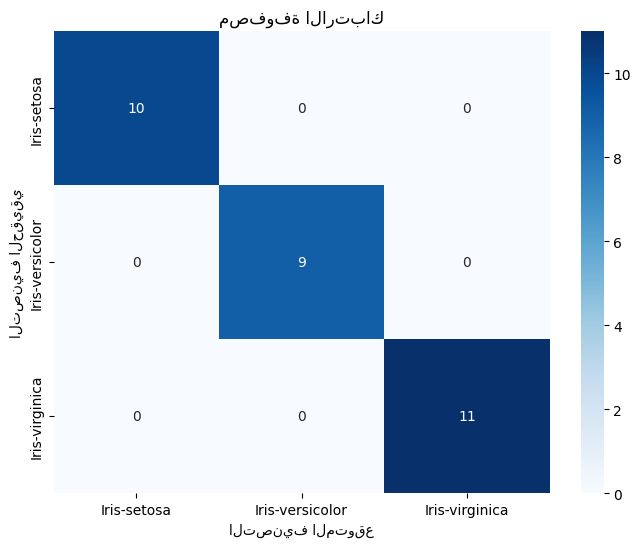

ℹ️ النموذج لا يدعم عرض أهمية الميزات أو هناك خطأ في الرسم


In [6]:
# الخلية 5: تقييم النموذج والرسوم البيانية
print("📉 تقييم أداء النموذج والرسوم البيانية")

# مصفوفة الارتباك
try:
    plot_confusion_matrix(y_test, y_pred, target_names)
except:
    print("⚠️  استخدام رسم بديل لمصفوفة الارتباك")
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, 
                yticklabels=target_names)
    plt.title('مصفوفة الارتباك')
    plt.ylabel('التصنيف الحقيقي')
    plt.xlabel('التصنيف المتوقع')
    plt.show()

# أهمية الميزات (إذا كان النموذج يدعمها)
try:
    plot_feature_importance(best_model, feature_names)
except:
    print("ℹ️ النموذج لا يدعم عرض أهمية الميزات أو هناك خطأ في الرسم")
    
    if hasattr(best_model, 'feature_importances_'):
        importance = best_model.feature_importances_
        indices = np.argsort(importance)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title('أهمية الميزات')
        plt.bar(range(len(importance)), importance[indices])
        plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()

In [7]:
# الخلية 6: حفظ النموذج والتنبؤات
print("💾 حفظ النموذج والتنبؤات")

try:
    # محاولة استخدام وظيفة الحفظ من المشروع
    model_path = save_model(best_model, best_model_name.replace(' ', '_'), best_accuracy)
    print(f"✅ تم حفظ النموذج في: {model_path}")
except:
    # إذا فشل الاستيراد، استخدام طريقة بديلة
    print("⚠️  استخدام طريقة بديلة لحفظ النموذج")
    import pickle
    import datetime
    
    # إنشاء مجلد models إذا لم يكن موجوداً
    if not os.path.exists('../models'):
        os.makedirs('../models')
    
    # حفظ النموذج
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"../models/{best_model_name.replace(' ', '_')}_{timestamp}.pkl"
    
    with open(filename, 'wb') as file:
        pickle.dump({
            'model': best_model,
            'accuracy': best_accuracy,
            'timestamp': timestamp
        }, file)
    
    print(f"✅ تم حفظ النموذج في: {filename}")

# مثال للتنبؤ بعينة جديدة
print("\n🔮 تنبؤ بعينة جديدة:")
try:
    prediction = predict_new_sample(best_model, [5.1, 3.5, 1.4, 0.2], target_names)
except:
    # طريقة بديلة للتنبؤ
    sample = [[5.1, 3.5, 1.4, 0.2]]  # Setosa
    prediction_idx = best_model.predict(sample)[0]
    prediction_proba = best_model.predict_proba(sample)[0]
    
    prediction = {
        'prediction': target_names[prediction_idx],
        'probabilities': {target_names[i]: prob for i, prob in enumerate(prediction_proba)}
    }

print(f"العينة: [5.1, 3.5, 1.4, 0.2]")
print(f"التنبؤ: {prediction['prediction']}")
print("الاحتمالات:")
for species, prob in prediction['probabilities'].items():
    print(f"  {species}: {prob:.4f}")

💾 حفظ النموذج والتنبؤات
⚠️  استخدام طريقة بديلة لحفظ النموذج
✅ تم حفظ النموذج في: ../models/Logistic_Regression_20250917_020449.pkl

🔮 تنبؤ بعينة جديدة:
العينة: [5.1, 3.5, 1.4, 0.2]
التنبؤ: Iris-setosa
الاحتمالات:
  Iris-setosa: 0.9786
  Iris-versicolor: 0.0214
  Iris-virginica: 0.0000


In [8]:
# الخلية 7: تشغيل كل الخلايا تلقائياً (اختياري)
print("🎉 تم تنفيذ تحليل بيانات Iris بنجاح!")

# عرض ملخص النتائج
print("\n📋 ملخص النتائج:")
print(f"   أفضل نموذج: {best_model_name}")
print(f"   دقة النموذج: {best_accuracy:.4f}")
print(f"   عدد العينات: {len(X)}")
print(f"   عدد الميزات: {len(feature_names)}")

# حفظ Notebook كملف HTML
try:
    import notebook as nb
    print("\n💾 يتم حفظ Notebook كملف HTML...")
    
    # هذا الكود سيحفظ Notebook كملف HTML عند تشغيله من خلال Jupyter
    # Note: في الوضع العادي، تحتاج إلى حفظ يدوي من قائمة File
except:
    print("ℹ️  يمكنك حفظ Notebook يدوياً من قائمة File → Save and Export Notebook As...")

🎉 تم تنفيذ تحليل بيانات Iris بنجاح!

📋 ملخص النتائج:
   أفضل نموذج: Logistic Regression
   دقة النموذج: 0.9667
   عدد العينات: 150
   عدد الميزات: 4

💾 يتم حفظ Notebook كملف HTML...
